In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(4712)

# Queueing simulation with antithetic draws

In [5]:
def exponential_rng(lam, u):  
    """ Generates exponential random number.
    
    Keywords:
        lam (float): the rate parameter, the inverse expectation of the distribution.
        u (float): Uniform random number.
    
    Returns:
        exponential random number with given rate.
    """
    ###
    #ADD YOUR CODE HERE
    ###
    return -np.log(u)*lam

In [3]:
class Event:
    """ Generic event.
    
    Attributes:
        time (float): Event time.
    """
    
    def __init__(self, time):
        self.time = time
        
class Generation(Event):
    """ Generation event.
    
    Attributes:
        time (float): Event time.
    """
    def __init__(self, time):
        super().__init__(time)
        
class Arrival(Event):
    """ Arrival event.
    
    Attributes:
        time (float): Event time.
    """
    def __init__(self, time):
        super().__init__(time)
        
class Departure(Event):
    """ Departure event.
    
    Attributes:
        time (float): Event time.
    """
    def __init__(self, time):
        super().__init__(time)
        
class Termination(Event):
    """ Termination event.
    
    Attributes:
        time (float): Event time.
    """
    def __init__(self, time):
        super().__init__(time)

In [4]:
class Scenario:
    """ Road scenario
    
    Attributes:
        demand duration (float): Duration of vehicle generation.
        t0 (float): Free-flow travel time.
        lam (float): Entry rate.
        mu (float): Service rate.
    """
    
    def __init__(self, 
                 demand_duration=50.0,
                 t0=1.0,
                 lam=1.0,
                 mu=1.0,
                ):
        self.demand_duration = demand_duration
        self.t0 = t0
        self.lam = lam
        self.mu = mu

In [6]:
def simulate(scenario, u):
    """ Implements the simulation procedure.
    
    Keywords:
        scenario (Scenario): Road scenario.
        u (array): 3 x N array of uniform random numbers, N must be sufficiently large.
    
    Returns:
        times (list): Event times. 
        queues (list): Queue length over time. 
    """
    
    ###
    #ADD YOUR CODE HERE
    ###
     #Initialise the simulation
    queue = 0
    times = [0]
    queues = [0]
    
    #Trigger the first events
    print('Start of generation')
    generation = Generation(exponential_rng(scenario.lam, u[0,0]))
    termination = Termination(scenario.demand_duration)
    events = [generation, termination]
    
    #Main loop
    i = 1
    while len(events):
        e = events[0]
        
        if isinstance(e, Generation):
            print('Generation')
            
            #Schedule arrival of the vehicle
            arrival = Arrival(e.time + scenario.t0 * u[1,i])
            events.append(arrival)
            
            #Schedule the next generation
            next_generation_time = e.time + exponential_rng(scenario.lam, u[0,i])
            if next_generation_time < scenario.demand_duration:
                generation = Generation(next_generation_time)
                events.append(generation)
                
        elif isinstance(e, Arrival):
            print('Arrival')
            
            #Update state variables
            times.append(e.time)
            queue += 1
            queues.append(queue)
            
            #Schedule the next departure, if the queue is empty
            if queue==1:
                departure = Departure(e.time + exponential_rng(scenario.mu, u[0,i]))
                events.append(departure)
                
        elif isinstance(e, Departure):
            print('Departure')
            
            #Update state variables
            times.append(e.time)
            queue -= 1
            queues.append(queue)
            
            #Schedule the next departure, if there are other vehicles waiting
            if queue:
                departure = Departure(e.time + exponential_rng(scenario.mu, u[0,i]))
                events.append(departure)
        elif isinstance(e, Termination):
            print('End of generation')
        else:
            raise('Unknown event type!')
            
        events.pop(0)
        events.sort(key=lambda event: event.time)
        i += 1
        
    return times, queues

In [7]:
def moving_mean_var(new_data, old_mean, old_var, t):
    """ Calculates moving sameple mean and variance at time t.
    
    Keywords:
        new_data (float): new data point arriving at time t.
        old_mean (float): previous sample mean.
        old_var (float): previous sample variance.
        t (int): time index
    
    Returns:
        new_mean (float): updated sample mean.
        new_var (float): updated sample variance.
    """

    ###
    #ADD YOUR CODE HERE
    ###
    new_mean = old_mean + (new_data - old_mean) / (t+1)
    if t == 0:
        new_var = (new_mean - old_mean)**2
    else:
        new_var = old_var * (1 - 1/t) + (new_mean - old_mean)**2 * (t+1)
    return new_mean, new_var

### Independent runs

In [8]:
#Requested precision for the estimation of the average maximum queue length. 
#Empirically calculated such that approximately 100 simulation runs are necessary.
precision = 0.5

max_queue_mean = 0
max_queue_var = 0
max_queue_all = []
max_queue_mean_all = []
max_queue_var_all = []
run = 0

scenario = Scenario()

#Main loop
while True:
    run += 1
    
    #Run simulation
    u = np.random.rand(3,1000)
    _, queues = simulate(scenario, u)
    max_queue = max(queues)
    
    #Collect statistics
    max_queue_mean, max_queue_var = moving_mean_var(max_queue, max_queue_mean, max_queue_var, run)
    max_queue_all.append(max_queue)
    max_queue_mean_all.append(max_queue_mean)
    max_queue_var_all.append(max_queue_var)
    
    #Check if necessary precision reached
    if run >= 100 and np.sqrt(max_queue_var / run) < precision:
        break
        
sd_independent = np.sqrt(max_queue_var_all)

Start of generation
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Generation
Generation
Departure
Departure
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Depar

### Antithetic runs

In [17]:
precision = 0.5
N = 1000

max_queue_mean = 0
max_queue_var = 0
max_queue_all = []
max_queue_mean_all = []
max_queue_var_all = []
scenario = Scenario()

###
#ADD YOUR CODE HERE
###
#Main loop
run = 0
while True:
    run += 1
    
    #Run simulation: independent run
    u = np.random.rand(3,N//2)
    _, queues = simulate(scenario, u)
    max_queue_indep = max(queues)

    #Run simulation: antithetic run
    u = 1 - u
    _, queues = simulate(scenario, u)
    max_queue_anti = max(queues)

    #Combine the results
    max_queue = (max_queue_indep + max_queue_anti) / 2
    
    #Collect statistics
    max_queue_mean, max_queue_var = moving_mean_var(max_queue, max_queue_mean, max_queue_var, run)
    max_queue_all.append(max_queue)
    max_queue_mean_all.append(max_queue_mean)
    max_queue_var_all.append(max_queue_var)
    
    #Check if necessary precision reached
    if run >= sd_independent.shape[0]/2:
        break

sd_antithetic = np.sqrt(max_queue_var_all)

Start of generation
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Generation
Generation
Arrival
Departure
Arrival
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Gene

Plot the standard deviation of maximum queue length.

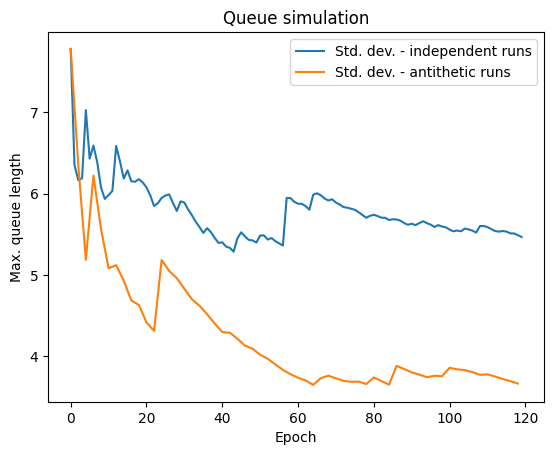

In [19]:
fig = plt.figure()
ax = plt.subplot(1,1,1)

ax.plot(sd_independent, label='Std. dev. - independent runs')
ax.plot(np.arange(0,sd_independent.shape[0],2), sd_antithetic, label='Std. dev. - antithetic runs')
ax.set(title='Queue simulation',
       xlabel='Epoch',
       ylabel='Max. queue length')
ax.legend()
fig.savefig('figure_antithetic.pdf', dpi=300)
plt.show()

# Queueing simulation with control variates

In [28]:
def controlled_mean(x, y, mu):
    """ Calculates the controlled mean.
    
    Keywords:
        x (array): Data.
        y (array): Control data.
        mu (float): Scalar expectation of the control data.
    
    Returns:
        avg (float): Controlled mean of the data.
        var (float): Variance of the controlled mean.
        z (array): Optimal linear combination of the data and the control data. 
    """

    ###
    #ADD YOUR CODE HERE
    ###
    var_y = np.var(y)
    cov_xy = np.cov(x, y)[0,1]

    if var_y == 0:
        c = 0
    else:
        c = - cov_xy / var_y
    z = x + c * (y - mu)

    avg = np.mean(z)
    var = np.var(z)
    
    return avg, var, z

In [29]:
def simulate(scenario):
    """ Implements the simulation procedure.
    
    Keywords:
        scenario (Scenario): Road scenario.
    
    Returns:
        times (list): Event times. 
        queues (list): Queue length over time. 
        service_time_mean (float): Mean service time
    """
    
    ###
    #ADD YOUR CODE HERE
    ###
    
    #Initialise the simulation
    queue = 0
    times = [0]
    times_arrival = []
    times_departure = []
    queues = [0]
    
    #Trigger the first events
    print('Start of generation')
    generation = Generation(exponential_rng(scenario.lam, u[0,0]))
    termination = Termination(scenario.demand_duration)
    events = [generation, termination]
    
    #Main loop
    i = 1
    while len(events):
        e = events[0]
        
        if isinstance(e, Generation):
            print('Generation')
            
            #Schedule arrival of the vehicle
            arrival = Arrival(e.time + scenario.t0 * np.random.rand())
            events.append(arrival)
            
            #Schedule the next generation
            next_generation_time = e.time + exponential_rng(scenario.lam, np.random.rand())
            if next_generation_time < scenario.demand_duration:
                generation = Generation(next_generation_time)
                events.append(generation)
                
        elif isinstance(e, Arrival):
            print('Arrival')
            
            #Update state variables
            times.append(e.time)
            times_arrival.append(e.time)
            queue += 1
            queues.append(queue)
            
            #Schedule the next departure, if the queue is empty
            if queue==1:
                departure = Departure(e.time + exponential_rng(scenario.mu, np.random.rand()))
                events.append(departure)
                
        elif isinstance(e, Departure):
            print('Departure')
            
            #Update state variables
            times.append(e.time)
            times_departure.append(e.time)
            queue -= 1
            queues.append(queue)
            
            #Schedule the next departure, if there are other vehicles waiting
            if queue:
                departure = Departure(e.time + exponential_rng(scenario.mu, np.random.rand()))
                events.append(departure)
        elif isinstance(e, Termination):
            print('End of generation')
        else:
            raise('Unknown event type!')
            
        events.pop(0)
        events.sort(key=lambda event: event.time)
        i += 1

    # calculate the mean service time
    service_time_mean = np.mean(np.array(times_departure) - np.array(times_arrival))
        
    return times, queues, service_time_mean

In [33]:
#Requested precision for the estimation of the average maximum queue length. 
#Empirically calculated such that approximately 100 simulation runs are necessary.
precision = 0.5

###
#ADD YOUR CODE HERE
###
max_queue_mean = 0
max_queue_var = 0
max_queue_all = []
max_queue_mean_all = []
max_queue_var_all = []
service_time_mean_all = []
max_queue_mean_control_all = []
max_queue_var_control_all = []
run = 0

scenario = Scenario()

#Main loop
while True:
    run += 1
    
    #Run simulation
    _, queues, service_time_mean = simulate(scenario)
    max_queue = max(queues)
    
    #Collect statistics
    max_queue_mean, max_queue_var = moving_mean_var(max_queue, max_queue_mean, max_queue_var, run)
    max_queue_all.append(max_queue)
    max_queue_mean_all.append(max_queue_mean)
    max_queue_var_all.append(max_queue_var)
    service_time_mean_all.append(service_time_mean)

    max_queue_mean_control, max_queue_var_control, z = controlled_mean(np.array(max_queue_all), np.array(service_time_mean_all), scenario.mu)
    max_queue_mean_control_all.append(max_queue_mean_control)
    max_queue_var_control_all.append(max_queue_var_control)

    #Check if necessary precision reached
    if run >= 100 and np.sqrt(max_queue_var / run) < precision:
        break

sd_independent = np.sqrt(max_queue_var_all)
sd_control = np.sqrt(max_queue_var_control_all)

Start of generation
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Generation
Generation
Arrival
Arrival
Arrival
Generation
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Departure
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Generation
Generation
Arrival
Departure
Arrival
Departure
Arrival
Generation
Arrival
Arrival
Generation
Departure
Arr

/tmp/ipykernel_19340/1342724029.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_xy = np.cov(x, y)[0,1]
/home/naschmid/Documents/Courses/OptimizationAndSimulation/Code/env_optisimu/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/naschmid/Documents/Courses/OptimizationAndSimulation/Code/env_optisimu/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Information on correlation

In [34]:
np.corrcoef(service_time_mean_all, max_queue_all)

array([[1.       , 0.9432032],
       [0.9432032, 1.       ]])

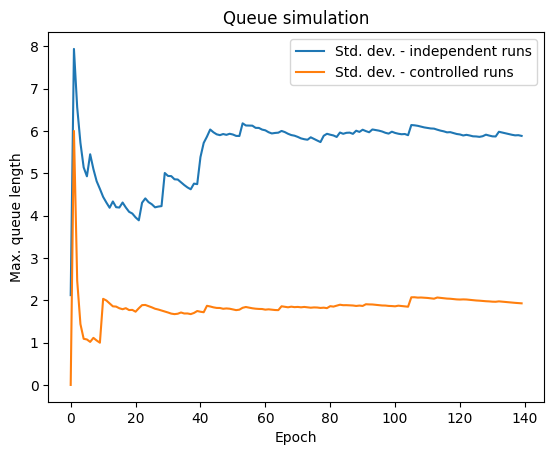

In [35]:
fig = plt.figure()
ax = plt.subplot(1,1,1)

ax.plot(sd_independent, label='Std. dev. - independent runs')
ax.plot(sd_control, label='Std. dev. - controlled runs')
ax.set(title='Queue simulation',
       xlabel='Epoch',
       ylabel='Max. queue length')
ax.legend()
fig.savefig('figure_control_variates.pdf', dpi=300)
plt.show()

In [ ]:
# Question: why is the variance in the solution for the variates smaller than for the independent runs?